Pruebas para bajar una query de redatam a un dataframe de Pandas

In [20]:
import caracu
import json
import numpy as np
import pandas as pd
from keplergl import KeplerGl 


# Elaboración de filtros

In [57]:

# Consulta para NBI Argentina
# Cantidad de casas que no posee inodoro o letrina HOGAR.H1510 = 2
query_nbi_ii_arg = 'HOGAR.H1510 = 2'


# Consulta para NBI Uruguay

# NBI II criterio agua potable:
#    Un hogar particular tendrá una necesidad básica insatisfecha con relación al abastecimiento de agua potable si esta
#    no llega por cañería dentro de la vivienda o si, en caso de que lo haga, el origen no sea red general ni pozo 
#    surgente protegido.
query_agua_potable_uy = 'HOGAR.H1409 > 3 OR HOGAR.H1308 <> 1'


# NBI II criterio excretas:
#    Un hogar particular tendrá necesidades básicas insatisfechas en saneamiento si cumple al menos una de las
#    siguientes condiciones: 
#        a) no accede a baño;
#        b) accediendo, su uso no es exclusivo del hogar o;
#        c) la evacuación del servicio sanitario no es a red general, fosa séptica o pozo negro.
# Uso exclusivo del baño: HOGAR.H1813
# Eliminacion de excretas: HOGAR.H1712 
# Tiene baño o letrina: HOGAR.H1510

query_excretas_uy = 'HOGAR.H1510 = 2 OR HOGAR.H1712 = 4 OR HOGAR.H1813 = 2'

query_nbi_uy = 'HOGAR.H1409 > 3 OR HOGAR.H1308 <> 1 OR HOGAR.H1510 = 2 OR HOGAR.H1712 = 4 OR HOGAR.H1813 = 2'

# Descarga de datos

In [58]:
nbi_ii_arg = caracu.get_query(query_nbi_ii_arg)

In [8]:
nbi_ii_arg.to_csv('nbi_ii_arg.csv')

In [6]:
agua_potable_uy = caracu.get_query(query_agua_potable_uy)

In [9]:
agua_potable_uy.to_csv('agua_potable_uy.csv')

In [12]:
excretas_uy = caracu.get_query(query_excretas_uy)
excretas_uy.to_csv('excretas_uy.csv')

In [13]:
nbi_ii_uy = caracu.get_query(query_nbi_uy)
nbi_ii_uy.to_csv('nbi_ii_uy.csv')

In [14]:
total = caracu.get_query('')
total.to_csv('total.csv')

In [15]:
nbi_ii_arg.head()

tipo_vivienda,Casa Tipo B,Casilla,Departamento,Local no construido para habitación,Pieza en hotel familiar o pensión,Pieza en inquilinato,Rancho,Total,Vivienda móvil
radio_cens,,,,,,,,,
820070101,0,0,0,0,0,0,0,0,0
820070102,3,0,0,0,0,0,0,3,0
820070103,5,0,0,0,0,0,0,5,0
820070104,1,0,0,0,0,0,0,1,0
820070201,1,0,0,0,0,0,0,1,0


In [16]:
nbi_ii_uy.head()

tipo_vivienda,Casa Tipo A,Casa Tipo B,Casilla,Departamento,Local no construido para habitación,Pieza en hotel familiar o pensión,Pieza en inquilinato,Rancho,Total,Vivienda móvil
radio_cens,,,,,,,,,,
820070101,12,4,0,0,0,0,0,0,16,0
820070102,20,7,0,0,0,0,0,0,27,0
820070103,7,12,0,0,0,0,1,0,20,0
820070104,8,3,1,0,0,0,0,0,12,0
820070201,5,9,0,0,0,0,0,0,14,0


# Sumarización de datos

In [25]:
total_hogares = total['Total'].sum()

In [30]:
hogares_nbi_ii_agua_uy = agua_potable_uy['Total'].sum()
print(f"NBI II UY (criterio agua potable): {hogares_nbi_ii_agua_uy} hogares (%{round(hogares_nbi_ii_agua_uy * 100 / total_hogares, 2)})")

NBI II UY (criterio agua potable): 99403 hogares (%9.75)


In [31]:
hogares_nbi_ii_excretas_uy = excretas_uy['Total'].sum()
print(f"NBI II UY (criterio excretas): {hogares_nbi_ii_excretas_uy} hogares (%{round(hogares_nbi_ii_excretas_uy * 100 / total_hogares, 2)})")

NBI II UY (criterio excretas): 40129 hogares (%3.94)


In [28]:
hogares_nbi_ii_uy = nbi_ii_uy['Total'].sum()
print(f"NBI II UY: {hogares_nbi_ii_uy} hogares (%{round(hogares_nbi_ii_uy * 100 / total_hogares, 2)})")

NBI II UY: 111545 hogares (%10.94)


In [29]:
hogares_nbi_ii_arg = nbi_ii_arg['Total'].sum()
print(f"NBI II ARG: {hogares_nbi_ii_arg} hogares (%{round(hogares_nbi_ii_arg * 100/ total_hogares, 2)})")

NBI II ARG: 17296 hogares (%1.7)


# Dataframes de NBI relativo y absoluto

In [30]:
nbi_ii_arg = pd.read_csv('nbi_ii_arg.csv')
nbi_ii_arg.radio_cens = nbi_ii_arg.radio_cens.apply(str)

nbi_ii_uy =  pd.read_csv('nbi_ii_uy.csv')
nbi_ii_uy.radio_cens = nbi_ii_uy.radio_cens.apply(str)

excretas_uy = pd.read_csv('excretas_uy.csv')
excretas_uy.radio_cens = excretas_uy.radio_cens.apply(str)

agua_potable_uy = pd.read_csv('agua_potable_uy.csv')
agua_potable_uy.radio_cens = agua_potable_uy.radio_cens.apply(str)

total = pd.read_csv('total.csv')
total.radio_cens = total.radio_cens.apply(str)

In [43]:
with open('../datos/Codgeo_Santa_Fe_con_datos/mygeodata/Santa_Fe_con_datos.geojson') as geojson:
    radios_santa_fe = json.load(geojson)

In [45]:
for feature in radios_santa_fe['features']:
    feature['properties'] = {'link': feature['properties']['link']}

In [47]:
for feature in radios_santa_fe['features']:
    radio_censal = feature['properties']['link']
    try:
        d_total = total[total.radio_cens == radio_censal]
        if not d_total.shape[0]:
            continue
        d_total = int(d_total['Total'].apply(int).iloc[0])
        if not d_total:
            continue
        d_arg = int(nbi_ii_arg[nbi_ii_arg.radio_cens == radio_censal]['Total'].apply(int).iloc[0])
        d_uy = int(nbi_ii_uy[nbi_ii_uy.radio_cens == radio_censal]['Total'].apply(int).iloc[0])
        d_agua_uy = int(agua_potable_uy[agua_potable_uy.radio_cens == radio_censal]['Total'].apply(int).iloc[0])
        d_excretas_uy = int(excretas_uy[excretas_uy.radio_cens == radio_censal]['Total'].apply(int).iloc[0])
        metadata = {
            'link': radio_censal,
            'total_hogares': d_total,
            'hogares_nbi_ii_ar': d_arg,
            'hogares_nbi_ii_uy': d_uy,
            'hogares_nbi_ii_uy_agua': d_agua_uy,
            'hogares_nbi_ii_uy_excretas': d_excretas_uy,
            'hogares_nbi_ii_uy_%': round(d_uy *100  / d_total, 2),
            'hogares_nbi_ii_uy_agua_%': round(d_agua_uy *100  / d_total, 2),
            'hogares_nbi_ii_uy_excretas_%': round(d_excretas_uy *100  / d_total, 2),
        }
        feature['properties'] = metadata
    except KeyError:
        print("Radio censal no encontrado en REDATAM: {}".format(feature['properties']['link']))


In [49]:

radios_rosario = []

for radio in radios_santa_fe['features']:
    if str(radio['properties']['link']).startswith('82084') and radio['properties'].get('hogares_nbi_ii_ar_%', 100) < 80 and radio['properties'].get('hogares_nbi_ii_uy_%', 100) < 80 :
        radios_rosario.append(radio)
# radios_santa_fe['features'] = radios_rosario

In [56]:
for r in radios_santa_fe['features']:
    print(r['properties'].get('hogares_nbi_ii_ar_%', 100))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [29]:
radios_santa_fe

{'type': 'FeatureCollection',
 'name': 'Santa_Fe_con_datos',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': []}

# Mostrar datos en el mapa

In [6]:
with open('rosario_nbi_final.json') as jsonfile:
    radios_santa_fe = json.load(jsonfile)

with open('kepler.config.json') as jsonfile:
    kepler_config = json.load(jsonfile)


In [7]:
mapa = KeplerGl(height=700, config=kepler_config)
mapa.add_data(radios_santa_fe, name="radios_censales")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [5]:
mapa

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '67yqg3p', 'type': …

Mapa online: https://kepler.gl/demo/map?mapUrl=https://dl.dropboxusercontent.com/s/nzdzhrf5nir9asb/keplergl_hijsov.json

In [8]:
nbi_ar_rel = [r['properties']['hogares_nbi_ii_ar_%'] for r in radios_santa_fe['features']]
nbi_uy_rel = [r['properties']['hogares_nbi_ii_uy_%'] for r in radios_santa_fe['features']]
nbi_ar = [r['properties']['hogares_nbi_ii_ar'] for r in radios_santa_fe['features']]
nbi_uy = [r['properties']['hogares_nbi_ii_uy'] for r in radios_santa_fe['features']]

/home/fly/repos/seminario_nbi/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/fly/repos/seminario_nbi/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


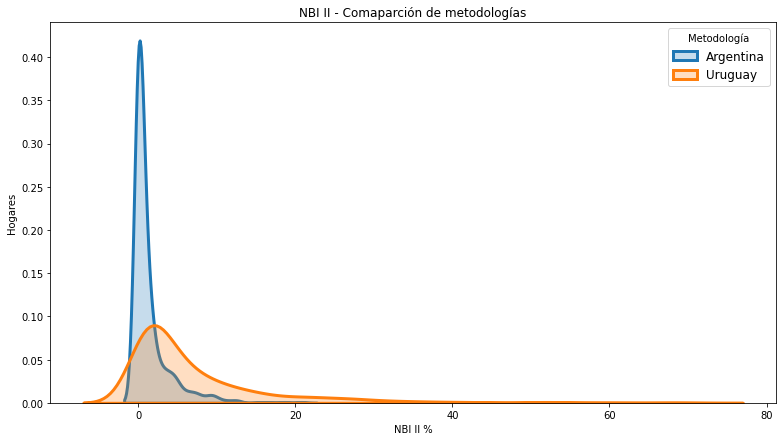

In [9]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

sns.distplot(nbi_ar_rel, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Argentina')

sns.distplot(nbi_uy_rel, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Uruguay')

# Add labels
plt.title('NBI II - Comaparción de metodologías')
plt.ylabel('Hogares')
plt.xlabel('NBI II %')

plt.legend(prop={'size': 12}, title = 'Metodología')

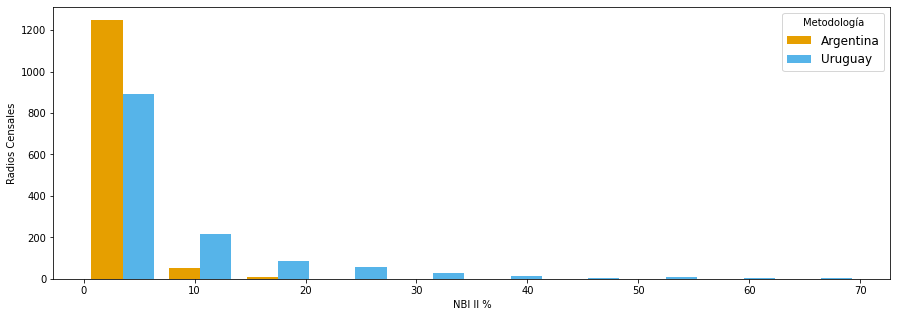

In [32]:

plt.figure(figsize=(15, 5))

colors = ['#E69F00', '#56B4E9',]
names = ['Argentina', 'Uruguay']
         
plt.hist([nbi_ar_rel, nbi_uy_rel], bins = 10, color = colors, label=names)
# Add labels
plt.ylabel('Radios Censales')
plt.xlabel('NBI II %')

plt.legend(prop={'size': 12}, title = 'Metodología')
plt.savefig("figura_02.png")

In [64]:
import numpy as np  

def statistics(arr):
    return {
        'mean': np.mean(arr),
        'min': np.min(arr),
        'q1': np.quantile(arr, 0.25),
        'median': np.median(arr),
        'q3': np.quantile(arr, 0.75),
        'max': np.max(arr),
        'var': np.var(arr),
        'std': np.std(arr)
    }

In [66]:
statistics(nbi_ar_rel)

{'mean': 1.355793893129771,
 'min': 0.0,
 'q1': 0.0,
 'median': 0.3,
 'q3': 1.52,
 'max': 20.97,
 'var': 6.389237194161179,
 'std': 2.5276940467867504}

In [67]:
statistics(nbi_uy_rel)

{'mean': 7.241572519083968,
 'min': 0.0,
 'q1': 1.2525,
 'median': 3.635,
 'q3': 9.2425,
 'max': 70.0,
 'var': 95.77120363405396,
 'std': 9.786276290502633}

In [18]:
def mejor_mitad(arr):
    m = np.median(arr)
    return [v for v in arr if v < m]

def peor_mitad(arr):
    m = np.median(arr)
    return [v for v in arr if v >= m]


In [23]:
len(nbi_uy_rel)

1310

In [25]:
print("Radios en la mitad mas favorecida")
print(f"AR: {len(mejor_mitad(nbi_ar_rel))}")
print(f"UY: {len(mejor_mitad(nbi_uy_rel))}")

Radios en la mitad mas favorecida
AR: 652
UY: 655


In [15]:
print("Radios en la mitad menos favorecida")
print(f"AR: {len(mejor_mitad(nbi_ar_rel))}")
print(f"UY: {len(mejor_mitad(nbi_uy_rel))}")

1310